# Average Order Value Higher Than Expected #
## March, 2017 ##
### A reasonable repalcement metric for the average order value is the median order vaue. ###
### Median Order Value: $284 ###
#### Alternatively, an AOV calculated after removing outliers in item price or order quantity could be used. ####
#### Modified AOV: $300 ####

Explain why to use median (fast; good estimate for expected order for 98% of shops)
alternative: eliminate orders of shop 78 with prices of \$25,725 or replace with \$257
also, eliminate orders of more than 10 items

In [1]:
import pandas as pd
import seaborn as sns

In [60]:
# Load the data and create a column for item price
df = pd.read_csv('2019_Winter_Data_Science_Intern_Challenge_Data_Set.csv', parse_dates=['created_at'])
df['item_price'] = df['order_amount'] / df['total_items']

The summary information below suggests two issues to investigate.
 - The largest order has 2,000 items. Are such large orders to be expected?
 - The most expensive item costs $25,725. This is likely an error.

In [62]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


<AxesSubplot:xlabel='item_price'>

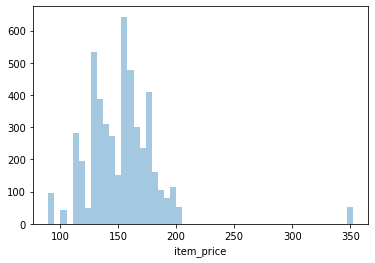

In [105]:
most_prices = df[df['item_price'] <= 400]
sns.distplot(most_prices['item_price'], kde=False)

The dataframe below shows that
 - only shop 78 has shoes priced above $400
 - 46 orders were placed at the shop during March, 2017
 - all of the shop's orders were for shoes priced at $25,725

In [106]:
high_prices = df[df['item_price'] > 400]
high_prices.groupby(by=['shop_id', 'item_price']).count()

,,order_id,user_id,order_amount,total_items,payment_method,created_at
shop_id,item_price,,,,,,
78,25725.0,46,46,46,46,46,46


In [103]:
high_prices.groupby(by=['shop_id', 'item_price']).count()

,,order_id,user_id,order_amount,total_items,payment_method,created_at
shop_id,item_price,,,,,,
78,25725.0,46,46,46,46,46,46


<AxesSubplot:xlabel='total_items'>

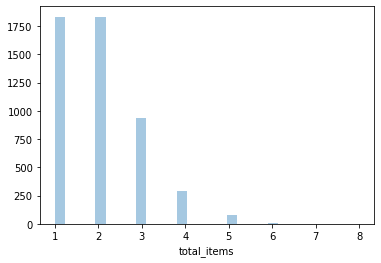

In [97]:
ten_or_fewer = df[df['total_items'] <= 10]
sns.distplot(ten_or_fewer['total_items'], kde=False)

<AxesSubplot:xlabel='total_items'>

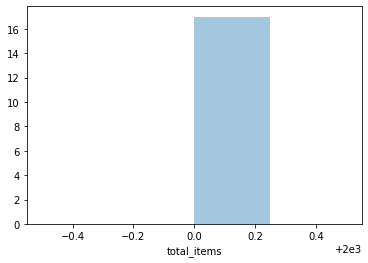

In [98]:
more_than_ten = df[df['total_items'] > 10]
sns.distplot(more_than_ten['total_items'], kde=False)

In [78]:
df[df['item_price'] > 300].groupby(['item_price', 'shop_id']).count()

,,order_id,user_id,order_amount,total_items,payment_method,created_at
item_price,shop_id,,,,,,
352.0,42,51,51,51,51,51,51
25725.0,78,46,46,46,46,46,46


In [84]:
df[df['total_items'] > 10].groupby(['total_items', 'shop_id']).count()

,,order_id,user_id,order_amount,payment_method,created_at,item_price
total_items,shop_id,,,,,,
2000,42,17,17,17,17,17,17
